#Reinforcement Learning in Memory Forensics for Malware Detections


#Overview of the existing solutions
i have read and analyzed numerous articles using reinforcement learning to detect malware, and the following one has caught my attention.

**Enhancing Machine Learning Based Malware Detection
Model by Reinforcement Learning** [the paper link](https://dl.acm.org/doi/abs/10.1145/3290480.3290494)

In summary, this article focuses on improving malware detection in the face of evolving threats. Essentially, it anticipates new variations of PE (Portable Executable) malware. However, their approach is centered around PE files, unlike our case that involves memory dumps. This led us to a question: if we continue to obtain these PE files and run them on a virtual machine using the Volatility framework, will we achieve better models or not? But first, let's explain what the article suggests.

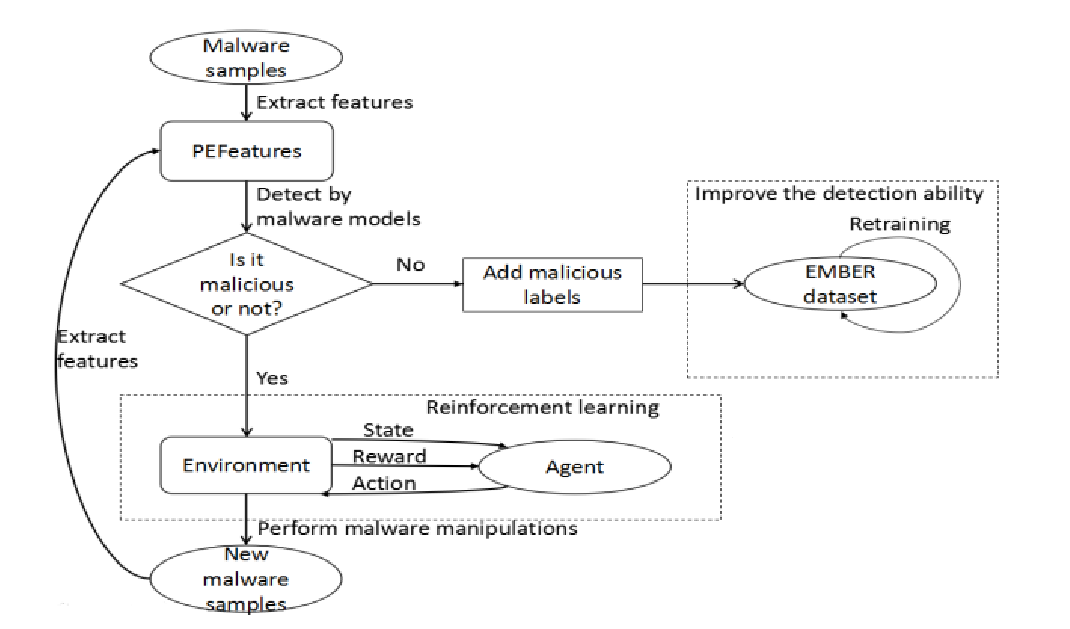

Rather than using a static dataset, they use reinforcement learning to generate new variants, which implies larger datasets.


#let's take a look on our approach first to fully understand it

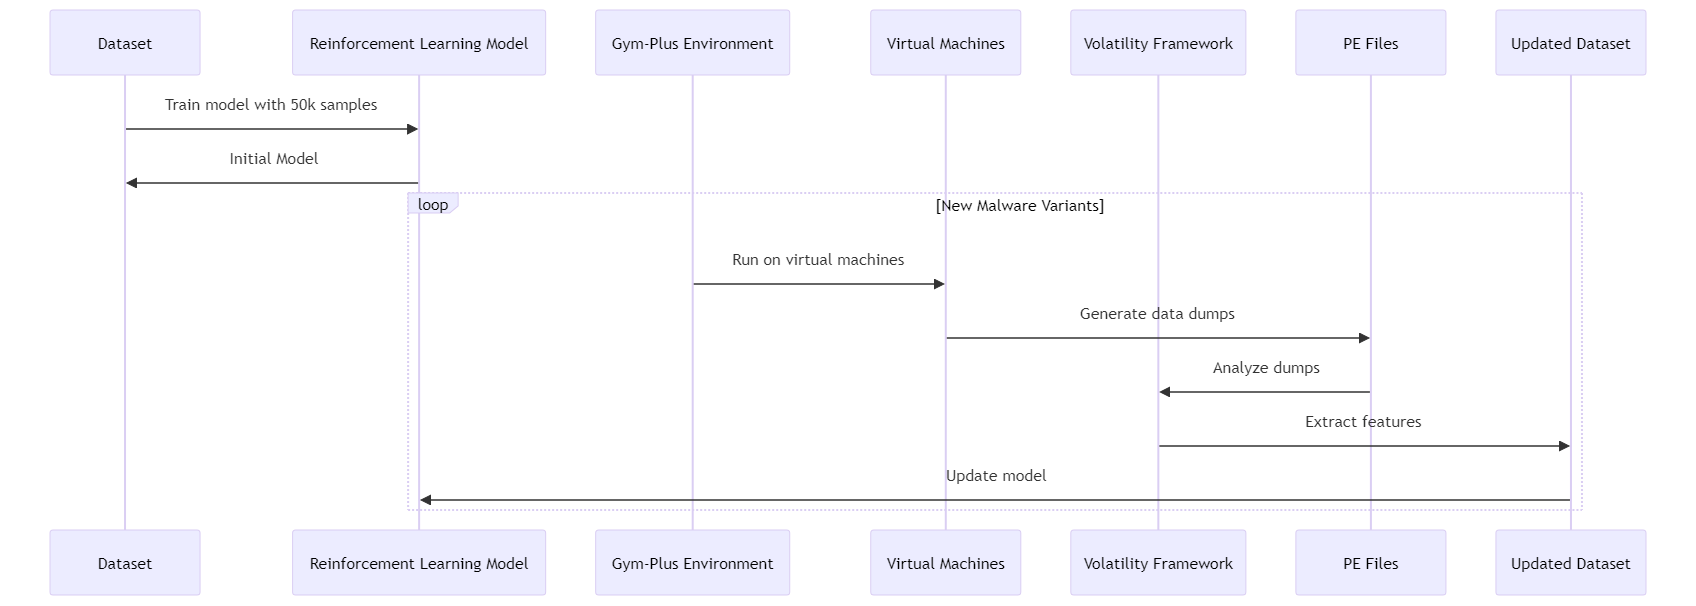


what we did is **collecting the data , process it , extract features , train some machine learning models first "because of them we got this creative approach that's why they are important to include" and then our DQN agent **
the rest which is ready using gym-plus we did want to include it but we had some serious diffeculties to implement so it's not included (also it wasn't part of our agrement)

#Why is this project a deep learning project

The deep learning aspect lies in the implementation of the Deep Q-Network (DQN) agent using the TensorFlow Keras API.

The DQN agent uses a neural network to approximate the Q-values for different actions in a given state.


#Dataset Overview

Obfuscated malware is malware that hides to avoid detection and extermination. The obfuscated malware dataset is designed to test obfuscated malware detection methods through memory. The dataset was created to represent as close to a real-world situation as possible using malware that is prevalent in the real world. Made up of Spyware, Ransomware and Trojan Horse malware, it provides a balanced dataset that can be used to test obfuscated malware detection systems.

This dataset uses debug mode for the memory dump process to avoid the dumping process to show up in the memory dumps. This works to represent a more accurate example of what an average user would have running at the time of a malware attack.

#Let's start with our data

In [ ]:
#importing our data and a quick analysis to it
import pandas as pd
#Loading our Data
file_path = '/content/Obfuscated-MalMem2022.csv'
data = pd.read_csv(file_path)
print(data.head())


  Category  pslist.nproc  pslist.nppid  pslist.avg_threads  \
0   Benign            45            17           10.555556   
1   Benign            47            19           11.531915   
2   Benign            40            14           14.725000   
3   Benign            32            13           13.500000   
4   Benign            42            16           11.452381   

   pslist.nprocs64bit  pslist.avg_handlers  dlllist.ndlls  \
0                   0           202.844444           1694   
1                   0           242.234043           2074   
2                   0           288.225000           1932   
3                   0           264.281250           1445   
4                   0           281.333333           2067   

   dlllist.avg_dlls_per_proc  handles.nhandles  handles.avg_handles_per_proc  \
0                  38.500000              9129                    212.302326   
1                  44.127660             11385                    242.234043   
2                  4

In [ ]:
#importing our data and a quick analysis to it
import pandas as pd
#Loading our Data
file_path = '/content/Obfuscated-MalMem2022.csv'
data = pd.read_csv(file_path)
print(data.head())


  Category  pslist.nproc  pslist.nppid  pslist.avg_threads  \
0   Benign            45            17           10.555556   
1   Benign            47            19           11.531915   
2   Benign            40            14           14.725000   
3   Benign            32            13           13.500000   
4   Benign            42            16           11.452381   

   pslist.nprocs64bit  pslist.avg_handlers  dlllist.ndlls  \
0                   0           202.844444           1694   
1                   0           242.234043           2074   
2                   0           288.225000           1932   
3                   0           264.281250           1445   
4                   0           281.333333           2067   

   dlllist.avg_dlls_per_proc  handles.nhandles  handles.avg_handles_per_proc  \
0                  38.500000              9129                    212.302326   
1                  44.127660             11385                    242.234043   
2                  4

In [ ]:
#Let's check for null values and see if our data needs any cleaning
checking_null = data.isnull().sum()
print(checking_null)

Category                                  0
pslist.nproc                              0
pslist.nppid                              0
pslist.avg_threads                        0
pslist.nprocs64bit                        0
pslist.avg_handlers                       0
dlllist.ndlls                             0
dlllist.avg_dlls_per_proc                 0
handles.nhandles                          0
handles.avg_handles_per_proc              0
handles.nport                             0
handles.nfile                             0
handles.nevent                            0
handles.ndesktop                          0
handles.nkey                              0
handles.nthread                           0
handles.ndirectory                        0
handles.nsemaphore                        0
handles.ntimer                            0
handles.nsection                          0
handles.nmutant                           0
ldrmodules.not_in_load                    0
ldrmodules.not_in_init          

Luckily we have a very good dataset with 0 null values
Now Lets see dive deeper into our dataset

In [ ]:
# Summary statistics for numerical columns
summary_stats = data.describe()
print(summary_stats)

       pslist.nproc  pslist.nppid  pslist.avg_threads  pslist.nprocs64bit  \
count  58596.000000  58596.000000        58596.000000             58596.0   
mean      41.394771     14.713837           11.341655                 0.0   
std        5.777249      2.656748            1.588231                 0.0   
min       21.000000      8.000000            1.650000                 0.0   
25%       40.000000     12.000000            9.972973                 0.0   
50%       41.000000     15.000000           11.000000                 0.0   
75%       43.000000     16.000000           12.861955                 0.0   
max      240.000000     72.000000           16.818182                 0.0   

       pslist.avg_handlers  dlllist.ndlls  dlllist.avg_dlls_per_proc  \
count         58596.000000   58596.000000               58596.000000   
mean            247.509819    1810.805447                  43.707806   
std             111.857790     329.782639                   5.742023   
min              3

We can easily see that we have 5 Columns to drop since they have either same values or they have a small variantions that would not contribute to our model
Columns = "pslist.nprocs64bit , handles.nport , svcscan.interactive_process_services , callbacks.nanonymous , callbacks.ngeneric"

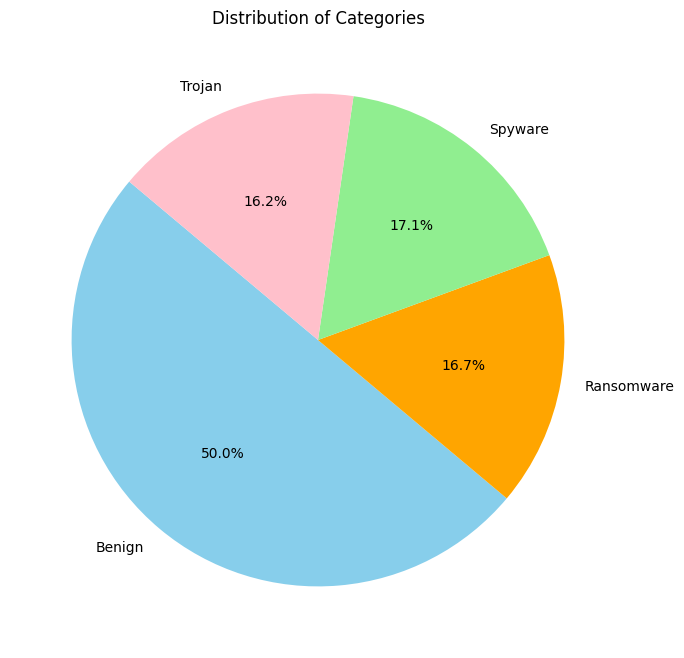



Benign     29298
Malware    29298
Name: Class, dtype: int64


In [ ]:
import matplotlib.pyplot as plt

# Frequency counts for a categorical column, e.g., 'Category'
category_counts = data['Category'].value_counts()
class_count = data['Class'].value_counts()
#notice that the originale data has category name + the name of the category for malecious programs for example (spyware + -180solutions-00a80e2e0f0f72ba202536615fa98cb11afafd519d9212b01e0678bc7f6e9ab4-1.raw)
#we define a small function to see if the row has the words we are looking for
#note that I Dont want to change the  whole column and well format it since I am not sure yet if we would need it raw in any of the next steps
def contains_word(s, word):
    return word in str(s)

count_Benign = data['Category'].apply(lambda x: contains_word(x, 'Benign')).sum()
count_Ransomware = data['Category'].apply(lambda x: contains_word(x, 'Ransomware')).sum()
count_Spyware = data['Category'].apply(lambda x: contains_word(x, 'Spyware')).sum()
count_Trojan = data['Category'].apply(lambda x: contains_word(x, 'Trojan')).sum()

categories = ['Benign', 'Ransomware', 'Spyware', 'Trojan']
counts = [count_Benign, count_Ransomware, count_Spyware, count_Trojan]
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=categories, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'orange', 'lightgreen', 'pink'])

plt.title('Distribution of Categories')


plt.show()
print('\n')
print(class_count)


#Balanced Classes:
The dataset is balanced with regard to the two main classes, 'Benign' and 'Malware', with each constituting 50% of the data. This is ideal .
#Distribution Among Malware:
Within the 'Malware' class, the distribution is fairly even among the three categories - Ransomware, Spyware, and Trojan , we won't suffer with biased model
#more insights
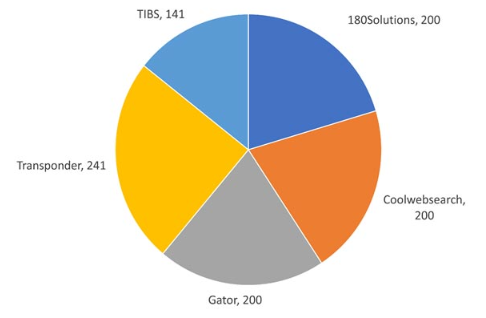


we have a lot of families of malecious programs which is pretty good for our initial model

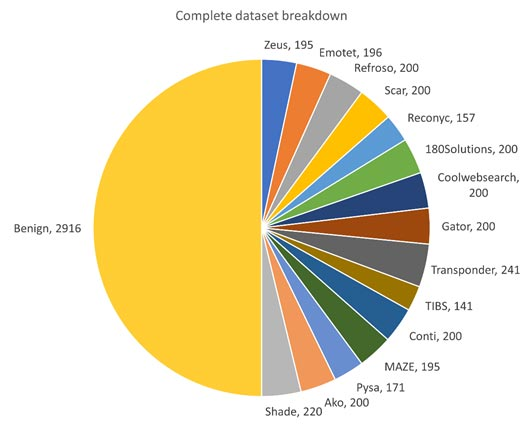

The figure above is a complete dataset breakdown

these last figures are from the data provider's website ; https://www.unb.ca/cic/datasets/malmem-2022.html


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#Let's drop the previous columns and let our data be ready for use
columns_to_drop = ["Category","pslist.nprocs64bit", "handles.nport", "svcscan.interactive_process_services",
                   "callbacks.nanonymous", "callbacks.ngeneric"]

data = data.drop(columns=columns_to_drop)

scaler = StandardScaler()
features = data.columns[:-1]  # Exclude the last column which is 'Class'
data[features] = scaler.fit_transform(data[features])
print(data.head)

<bound method NDFrame.head of        pslist.nproc  pslist.nppid  pslist.avg_threads  pslist.avg_handlers  \
0          0.624044      0.860519           -0.494957            -0.399308   
1          0.970233      1.613326            0.119794            -0.047165   
2         -0.241427     -0.268691            2.130278             0.363994   
3         -1.626181     -0.645094            1.358973             0.149937   
4          0.104762      0.484116            0.069717             0.302382   
...             ...           ...                 ...                  ...   
58591     -0.760710      0.107713           -0.776687            -0.286289   
58592     -0.760710     -0.268691           -0.878790            -0.512205   
58593     -0.587615      0.107713           -0.944172            -0.335102   
58594     -0.760710      0.107713           -0.691601            -0.286047   
58595     -0.587615      0.107713           -0.927602            -0.308282   

       dlllist.ndlls  dlllist.avg

In [ ]:
# Skewness and Kurtosis
# Skewness
skewness = data.skew()
print("Skewness:\n", skewness)

# Kurtosis
kurtosis = data.kurtosis()
print("Kurtosis:\n", kurtosis)

Skewness:
 pslist.nproc                                7.050007
pslist.nppid                                2.904976
pslist.avg_threads                          0.117473
pslist.avg_handlers                       181.666637
dlllist.ndlls                               0.324566
dlllist.avg_dlls_per_proc                  -0.020334
handles.nhandles                          165.268174
handles.avg_handles_per_proc              206.888348
handles.nfile                             221.508473
handles.nevent                              0.199744
handles.ndesktop                            1.277719
handles.nkey                                1.209906
handles.nthread                             0.434460
handles.ndirectory                          1.937715
handles.nsemaphore                          0.508809
handles.ntimer                             -0.093195
handles.nsection                           17.557235
handles.nmutant                             0.428861
ldrmodules.not_in_load             

<ipython-input-6-bfdcc98fb0d9>:3: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  skewness = data.skew()
<ipython-input-6-bfdcc98fb0d9>:7: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  kurtosis = data.kurtosis()


I won't take this into consideration since I am not expert in the memory dumps and rather i'd keep this cell just in case the raw fitted models didn't perform well then we will be back to it
#Now let's see how our models with perform with our raw data

In [ ]:
!pip install xgboost scikit-learn


In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd
data['Class'] = data['Class'].map({'Benign': 0, 'Malware': 1})  # Encode the classes

# Split the data into features (X) and target (y)
X = data.drop('Class', axis=1)

y = data['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Output the shapes of the splits as a sanity check
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print(X_train.head())
print(y_train.head())


Training set shape: (46876, 50)
Test set shape: (11720, 50)
X_train shape: (46876, 50)
y_train shape: (46876,)
       pslist.nproc  pslist.nppid  pslist.avg_threads  pslist.avg_handlers  \
55078     -0.241427      0.484116           -1.128092            -0.398588   
46970      0.450950      0.860519           -1.302673            -0.441602   
29180     -1.799275     -1.397900            1.104366             0.440514   
46424     -0.587615      0.107713           -0.728770            -0.288991   
39359      0.450950      0.484116           -0.386838            -0.336354   

       dlllist.ndlls  dlllist.avg_dlls_per_proc  handles.nhandles  \
55078      -0.900011                  -1.020173         -0.440037   
46970      -0.445162                  -1.025714         -0.316754   
29180      -0.699877                   1.060931         -0.172306   
46424      -0.951560                  -0.751147         -0.427709   
39359      -0.287481                  -0.819893         -0.210113   

     

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.metrics import classification_report, accuracy_score

# Initialize the models
rf_clf = RandomForestClassifier(random_state=42)
svm_clf = SVC(random_state=42)
knn_clf = KNeighborsClassifier()
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Fit the models
rf_clf.fit(X_train, y_train)
svm_clf.fit(X_train, y_train)
knn_clf.fit(X_train, y_train)
xgb_clf.fit(X_train, y_train)

# Predictions
rf_preds = rf_clf.predict(X_test)
svm_preds = svm_clf.predict(X_test)
knn_preds = knn_clf.predict(X_test)
xgb_preds = xgb_clf.predict(X_test)

# Evaluation
print("Random Forest Classifier Performance:")
print(classification_report(y_test, rf_preds))
print("Accuracy:", accuracy_score(y_test, rf_preds))

print("\nSupport Vector Machine Classifier Performance:")
print(classification_report(y_test, svm_preds))
print("Accuracy:", accuracy_score(y_test, svm_preds))

print("\nK-Nearest Neighbors Classifier Performance:")
print(classification_report(y_test, knn_preds))
print("Accuracy:", accuracy_score(y_test, knn_preds))

print("\nXGBoost Classifier Performance:")
print(classification_report(y_test, xgb_preds))
print("Accuracy:", accuracy_score(y_test, xgb_preds))

Random Forest Classifier Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5790
           1       1.00      1.00      1.00      5930

    accuracy                           1.00     11720
   macro avg       1.00      1.00      1.00     11720
weighted avg       1.00      1.00      1.00     11720

Accuracy: 0.999914675767918

Support Vector Machine Classifier Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5790
           1       1.00      1.00      1.00      5930

    accuracy                           1.00     11720
   macro avg       1.00      1.00      1.00     11720
weighted avg       1.00      1.00      1.00     11720

Accuracy: 0.9992320819112628

K-Nearest Neighbors Classifier Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5790
           1       1.00      1.00      1.00      

#the models performed very well (and it's not an overfitting) but?

a question occured to us after getting this high performence on almost all models , if machine learning is really that good than why don't we only use it ?
we found out that the variantions of malwares keeps detecting new malwares really hard so to solve that we thought of combining the gym-plus solution and our RL model
Now our RL model

In [ ]:
#create a new df
import pandas as pd
df  = pd.read_csv('/content/Obfuscated-MalMem2022.csv')
df = df.drop('Category', axis=1)


import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from collections import deque
import random




df['Class'] = df['Class'].astype('category').cat.codes

# Splitting the dataset
X = df.drop('Class', axis=1).values
y = df['Class'].values

# Define the environment
class ClassificationEnv:
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels
        self.current_step = 0
        self.done = False

    def reset(self):
        self.current_step = 0
        self.done = False
        return self.data[self.current_step]

    def step(self, action):
        reward = 0
        self.current_step += 1
        if self.current_step >= len(self.data):
            self.done = True
            if action == self.labels[self.current_step - 1]:
                reward = 1
            else:
                reward = -1
        return self.data[self.current_step], reward, self.done

# Initialize the environment
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the environment with the training data
env = ClassificationEnv(X_train, y_train)

# DQN Agent
class DQNAgent:
    def __init__(self, state_size, action_size):
        self.state_size = state_size
        self.action_size = action_size
        self.memory = deque(maxlen=2000)
        self.gamma = 0.95    # discount rate
        self.epsilon = 1.0  # exploration rate
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.995
        self.learning_rate = 0.001
        self.model = self._build_model()

    def _build_model(self):
        model = Sequential()
        model.add(Dense(24, input_dim=self.state_size, activation='relu'))
        model.add(Dense(24, activation='relu'))
        model.add(Dense(self.action_size, activation='linear'))
        model.compile(loss='mse', optimizer=Adam(learning_rate=self.learning_rate))
        return model

    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))

    def act(self, state):
        if np.random.rand() <= self.epsilon:
            return random.randrange(self.action_size)
        act_values = self.model.predict(state)
        return np.argmax(act_values[0])

    def replay(self, batch_size):
        minibatch = random.sample(self.memory, batch_size)
        for state, action, reward, next_state, done in minibatch:
            target = reward
            if not done:
                target = reward + self.gamma * np.amax(self.model.predict(next_state)[0])
            target_f = self.model.predict(state)
            target_f[0][action] = target
            self.model.fit(state, target_f, epochs=1, verbose=0)
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

    def evaluate(self, X_test, y_test):
        predictions = []
        for state in X_test:
            state = np.reshape(state, [1, X.shape[1]])
            action = np.argmax(self.model.predict(state)[0])
            predictions.append(action)
        accuracy = accuracy_score(y_test, predictions)
        precision = precision_score(y_test, predictions, average='macro')
        recall = recall_score(y_test, predictions, average='macro')
        f1 = f1_score(y_test, predictions, average='macro')
        return accuracy, precision, recall, f1

# Number of actions (classifications)
n_actions = len(np.unique(y_train))
evaluation_interval = 1
# Initialize DQN agent
agent = DQNAgent(X_train.shape[1], n_actions)
total_episodes =6
# Train the agent
for e in range(total_episodes):
    state = env.reset()
    state = np.reshape(state, [1, X_train.shape[1]])
    for time in range(50):
        action = agent.act(state)
        next_state, reward, done = env.step(action)
        next_state = np.reshape(next_state, [1, X_train.shape[1]])
        agent.remember(state, action, reward, next_state, done)
        state = next_state
        if done:
            break
            # Evaluate every 'n' episodes
    if e % evaluation_interval == 0:
        accuracy, precision, recall, f1 = agent.evaluate(X_test, y_test)
        print(f"Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}")
        print("new ep done")
    agent.replay(32)

# Final evaluation
accuracy, precision, recall, f1 = agent.evaluate(X_test, y_test)
print("Final Evaluation - Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}")




Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 19ms/step
Accuracy: 0.79811827956989246, Precision: 0.6857923056228141, Recall: 0.599728578514518, F1 Score: 0.53297087387592184
new ep done
1/1 [==============================] - 0s 22ms/step
Final Evaluation - Accuracy: 0.8748387096774193, Precision: 0.8649063032367973, Recall: 0.8533980582524272, F1 Score: 0.8428163951080373


now that the RL model is ready we can integrate it in a gym-plus env to get newer samples and enhance it's accuracy